In [1]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob, os
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['svg.fonttype'] = 'none'


In [6]:
input_statistics_quast=snakemake.params.input_quast_report
SAMPLES=list(snakemake.params.samples)
#----------------------------------------------------------------------
output_log_number_contigs_png=snakemake.output.log_number_contigs_png
output_log_number_contigs_svg=snakemake.output.log_number_contigs_svg
output_contig_length_bp_png=snakemake.output.contig_length_bp_png
output_contig_length_bp_svg=snakemake.output.contig_length_bp_svg
output_contig_number_total_png=snakemake.output.contig_number_total_png
output_contig_number_total_svg=snakemake.output.contig_number_total_svg
output_contig_length_total_png=snakemake.output.contig_length_total_png
output_contig_length_total_svg=snakemake.output.contig_length_total_svg

In [35]:
# Sort the SAMPLES list
SAMPLES.sort()

# Read in the input_statistics_quast file as a pandas dataframe
df=pd.read_csv(input_statistics_quast, sep="\t")

# Remove "_spades" from the "Assembly" column values
df["Assembly"]=df["Assembly"].str.split("_spades").str[0]

# Remove "_corrected_scaffolds_pilon.tot" from the "Assembly" column values
df["Assembly"]=df["Assembly"].str.split("_corrected_scaffolds_pilon.tot").str[0]

# Sort the dataframe by the "Assembly" column
df=df.sort_values(by="Assembly")
df

,Assembly,# contigs (>= 0 bp),# contigs (>= 1000 bp),# contigs (>= 5000 bp),# contigs (>= 10000 bp),# contigs (>= 25000 bp),# contigs (>= 50000 bp),Total length (>= 0 bp),Total length (>= 1000 bp),Total length (>= 5000 bp),...,Total length (>= 50000 bp),# contigs,Largest contig,Total length,GC (%),N50,N75,L50,L75,# N's per 100 kbp
2,Vir_3_0,15930,15930,846,251,57,4,35244969,35244969,9080041,...,245506,15930,84148,35244969,46.15,2287,1449,3582,8526,100.24
4,Vir_3_1,12199,12199,611,256,116,54,30658372,30658372,11461805,...,4587723,12199,238215,30658372,48.94,2657,1466,1741,5772,51.14
5,Vir_3_1_1,4811,4811,367,187,97,51,16270754,16270754,8635960,...,4272590,4811,238215,16270754,50.46,6351,1822,277,1684,51.93
7,Vir_3_1_2,5412,5412,381,201,96,49,16965949,16965949,8578152,...,3971264,5412,224629,16965949,50.67,5247,1677,363,2028,40.26
9,Vir_3_1_3,3635,3635,288,163,89,49,13243358,13243358,7645512,...,4118105,3635,144027,13243358,51.18,11572,1910,146,1116,35.79
3,Vir_3_2,22201,22201,977,263,59,7,45902992,45902992,10026630,...,397650,22201,59689,45902992,47.57,2072,1371,5387,12319,65.69
8,Vir_3_2_1,8710,8710,346,105,28,4,17934642,17934642,3870370,...,230533,8710,59371,17934642,46.76,2064,1365,2107,4835,71.37
6,Vir_3_2_2,8238,8238,366,102,28,1,17065774,17065774,3877832,...,57278,8238,57278,17065774,47.21,2069,1362,1965,4561,74.89
10,Vir_3_2_3,8530,8530,410,126,26,0,17936748,17936748,4290966,...,0,8530,47244,17936748,45.47,2099,1384,1995,4688,86.97
1,Vir_3_T,40014,40014,3023,1107,360,93,105738178,105738178,40838577,...,7163325,40014,238215,105738178,48.26,3126,1584,6134,18603,663.93


/tmp/ipykernel_93133/1496175676.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,ax.get_ylim()[1]*1.5)


NameError: name 'output_log_number_contigs_png' is not defined

<Figure size 864x864 with 0 Axes>

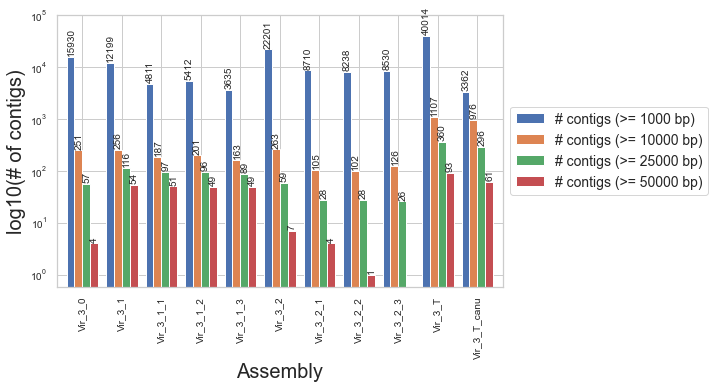

In [37]:
# Set figure size and font scale for seaborn
plt.figure(figsize=(12,12))
sns.set(font_scale=2)
sns.set_style("whitegrid")

# Define the width of the figure based on the number of samples
fig_width = .8 * len(SAMPLES)

# Create the bar chart using pandas dataframe
ax = df.plot(x="Assembly", y=["# contigs (>= 1000 bp)", "# contigs (>= 10000 bp)", "# contigs (>= 25000 bp)", "# contigs (>= 50000 bp)"], kind="bar", figsize=(fig_width,5),width=0.8)

# Add annotations for the height of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.15),rotation=90, fontsize=10,transform=ax.transAxes)

# Set the y-scale to log
ax.set_yscale('log')

# Set the y-limit to 1.5 times the current limit
ax.set_ylim(0,ax.get_ylim()[1]*1.5)

# Set x and y labels and tick label sizes
ax.set_xlabel("Assembly",fontsize=20)
ax.set_ylabel("log10(# of contigs)",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Add legend to the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=14)

# Save the figure as png and svg
ax.figure.savefig(output_log_number_contigs_png, format="png")
ax.figure.savefig(output_log_number_contigs_svg, format="svg")

# Display the plot
plt.show()


/tmp/ipykernel_93133/3384491998.py:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,ax.get_ylim()[1]*5)


<Figure size 864x864 with 0 Axes>

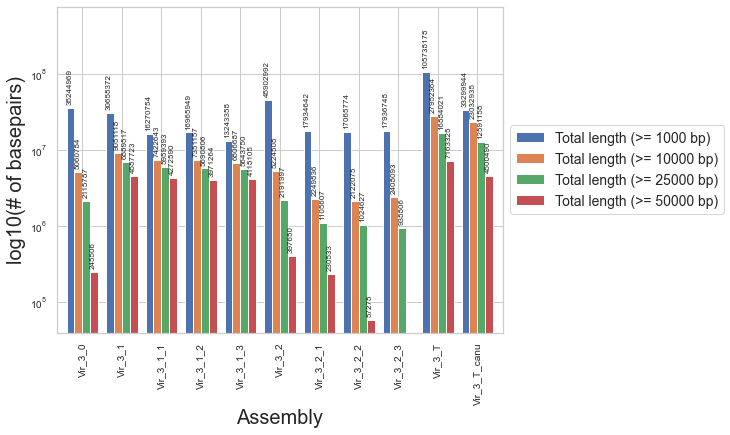

In [24]:
# set figure size and font scale for seaborn
plt.figure(figsize=(12,12))
sns.set(font_scale=2)
sns.set_style("whitegrid")

fig_width=.8*len(SAMPLES)
ax=df.plot(x="Assembly", y=["Total length (>= 1000 bp)", "Total length (>= 10000 bp)", "Total length (>= 25000 bp)", "Total length (>= 50000 bp)"], kind="bar", figsize=(fig_width,6),width=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.15),rotation=90, fontsize=8, transform=ax.transAxes)
ax.set_yscale('log')
ax.set_ylim(0,ax.get_ylim()[1]*5)

ax.set_xlabel("Assembly",fontsize=20)
ax.set_ylabel("log10(# of basepairs)",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=14)
ax.figure.savefig(output_contig_length_bp_png  , format="png")
ax.figure.savefig(output_contig_length_bp_svg  , format="svg")
plt.show()

/tmp/ipykernel_93133/2554122321.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,ax.get_ylim()[1]*1.5)


<Figure size 864x864 with 0 Axes>

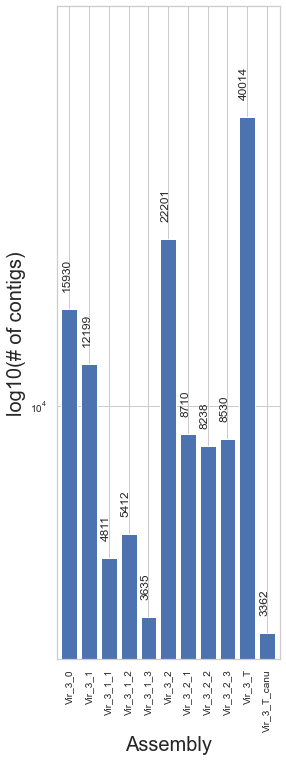

In [28]:
# set figure size and font scale for seaborn
plt.figure(figsize=(12,12))
sns.set(font_scale=2)
sns.set_style("whitegrid")


fig_width=.4*len(SAMPLES)
ax=df.plot(x="Assembly", y=["# contigs (>= 1000 bp)"], kind="bar", figsize=(fig_width,12),width=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.1),rotation=90,fontsize=12,transform=ax.transAxes)
ax.set_yscale('log')
ax.set_ylim(0,ax.get_ylim()[1]*1.5)

ax.set_xlabel("Assembly",fontsize=20)
ax.set_ylabel("log10(# of contigs)",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)

ax.get_legend().remove()
ax.figure.savefig(output_contig_number_total_png , format="png")
ax.figure.savefig(output_contig_number_total_svg , format="svg")

plt.show()

<Figure size 864x864 with 0 Axes>

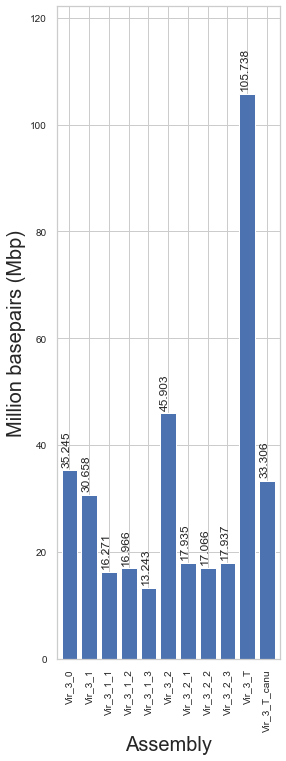

In [33]:
# set figure size and font scale for seaborn
plt.figure(figsize=(12,12))
sns.set(font_scale=2)
sns.set_style("whitegrid")


df["Total length million"]=(df["Total length"]/1000000).round(3)
fig_width=.4*len(SAMPLES)

ax=df.plot(x="Assembly", y=["Total length million"], kind="bar", figsize=(fig_width,12),width=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 1),rotation=90,fontsize=12)
ax.set_ylim(0,ax.get_ylim()[1]*1.1)


ax.set_xlabel("Assembly",fontsize=20)
ax.set_ylabel("Million basepairs (Mbp)",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.get_legend().remove()

ax.figure.savefig(output_contig_length_total_png  , format="png")
ax.figure.savefig(output_contig_length_total_svg  , format="svg")

plt.show()